In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('cbi')
%matplotlib inline

In [2]:
df = pd.read_csv('mlb_standings_062715.csv')

In [30]:
pyth_exp = 1.83
df['Pyth'] = df.apply(lambda r: pow(r.R, pyth_exp)/(pow(r.R, pyth_exp) + pow(r.RA, pyth_exp)), axis = 1)
df['LuckCalc'] = df.W - df.Pyth * df.G
df['WinCalc'] = df.apply(lambda r: round(r.W - r.LuckCalc), axis = 1)
df['LossCalc'] = df.W + df.L - df.WinCalc

In [4]:
df.sort('W-L%', ascending = False, inplace = True)
df['WinRnk'] = range(1, 31)

df.sort('Pyth', ascending = False, inplace = True)
df['PythRnk'] = range(1, 31)

In [31]:
cols = ['Tm', 'G', 'W', 'L', 'W-L%', 'WinRnk', 'Pyth', 'PythRnk', 'LuckCalc', 'WinCalc', 'LossCalc']

In [33]:
df[cols].sort('W', ascending = True).tail(10)

,Tm,G,W,L,W-L%,WinRnk,Pyth,PythRnk,LuckCalc,WinCalc,LossCalc
12,TOR,75,40,35,0.533,13,0.618550,2,-6.391235,46,29
11,SFG,75,40,35,0.533,12,0.522307,13,0.826999,39,36
8,NYY,74,40,34,0.540,9,0.529492,11,0.817585,39,35
6,TBR,75,41,34,0.547,7,0.525401,12,1.594901,39,36
5,WSN,74,41,33,0.554,6,0.543494,9,0.781429,40,34
3,PIT,73,41,32,0.562,4,0.573809,5,-0.888069,42,31
4,LAD,75,42,33,0.560,5,0.605816,3,-3.436163,45,30
1,KCR,70,42,28,0.600,2,0.590789,4,0.644781,41,29
2,HOU,76,43,33,0.566,3,0.566672,6,-0.067047,43,33
0,STL,73,49,24,0.671,1,0.653325,1,1.307299,48,25


In [7]:
df.sort('WinRnk', inplace = True)
df.reset_index(drop = True, inplace = True)

In [14]:
tm_colors = {'ARI' : '#A71930','ATL' : '#002F5F','BAL' : '#ED4C09','BOS' : '#C60C30','CHC' : '#003279','CHW' : '#C0C0C0','CIN' : '#C6011F','CLE' : '#003366','COL' : '#333366','DET' : '#DE4406','HOU' : '#FF7F00','KCR' : '#74B4FA','LAA' : '#B71234','LAD' : '#083C6B','MIA' : '#F9423A','MIL' : '#92754C','MIN' : '#C6011F','NYM' : '#FB4F14','NYY' : '#1C2841','OAK' : '#003831','PHI' : '#BA0C2F','PIT' : '#000000','SDP' : '#002147','SFG' : '#F2552C','SEA' : '#005C5C','STL' : '#C41E3A','TBR' : '#9ECEEE','TEX' : '#BD1021','TOR' : '#003DA5','WSN' : '#BA1225'}

In [15]:
df['shift'] = df.LuckCalc.apply(lambda l: 'red' if l > 0 else 'blue' if l < 0 else 'white')
df['tmColor'] = df.Tm.apply(lambda t: tm_colors[t])
df.head()

,Rk,Tm,Lg,G,W,L,W-L%,Strk,R,RA,...,last10,last20,last30,Pyth,LuckCalc,WinCalc,WinRnk,PythRnk,shift,tmColor
0,1,STL,NL,73,49,24,0.671,W 4,4.1,2.9,...,7-3,14-6,22-8,0.653325,1.307299,48,1,1,red,#C41E3A
1,2,KCR,AL,70,42,28,0.600,W 2,4.4,3.6,...,7-3,12-8,16-14,0.590789,0.644781,41,2,4,red,#74B4FA
2,3,HOU,AL,76,43,33,0.566,L 1,4.4,3.8,...,5-5,9-11,14-16,0.566672,-0.067047,43,3,6,blue,#FF7F00
3,4,PIT,NL,73,41,32,0.562,W 1,4.0,3.4,...,5-5,12-8,20-10,0.573809,-0.888069,42,4,5,blue,#000000
4,5,LAD,NL,75,42,33,0.560,W 3,4.3,3.4,...,5-5,11-9,14-16,0.605816,-3.436163,45,5,3,blue,#083C6B


In [38]:
# Real Life Standings
standings_cols = ['Rk', 'Tm', 'G', 'W', 'L', 'W-L%']
df[standings_cols].sort('Rk')

,Rk,Tm,G,W,L,W-L%
0,1,STL,73,49,24,0.671
1,2,KCR,70,42,28,0.600
2,3,HOU,76,43,33,0.566
3,4,PIT,73,41,32,0.562
4,5,LAD,75,42,33,0.560
5,6,WSN,74,41,33,0.554
6,7,TBR,75,41,34,0.547
7,8,CHC,72,39,33,0.542
8,9,NYY,74,40,34,0.540
9,10,MIN,73,39,34,0.534


In [41]:
# Pyth Standings
standings_cols = ['PythRnk', 'Tm', 'G', 'WinCalc', 'LossCalc', 'Pyth']
df[standings_cols].sort('PythRnk')

,PythRnk,Tm,G,WinCalc,LossCalc,Pyth
0,1,STL,73,48,25,0.653325
12,2,TOR,75,46,29,0.618550
4,3,LAD,75,45,30,0.605816
1,4,KCR,70,41,29,0.590789
3,5,PIT,73,42,31,0.573809
2,6,HOU,76,43,33,0.566672
24,7,OAK,76,43,33,0.565097
10,8,BAL,73,41,32,0.563595
5,9,WSN,74,40,34,0.543494
7,10,CHC,72,38,34,0.534708


In [42]:
df.sort('LuckCalc')

,Rk,Tm,Lg,G,W,L,W-L%,Strk,R,RA,...,last20,last30,Pyth,LuckCalc,WinCalc,WinRnk,PythRnk,shift,tmColor,LossCalc
24,25,OAK,AL,76,34,42,0.447,L 1,4.5,3.9,...,11-9,18-12,0.565097,-8.947375,43,25,7,blue,#003831,33
12,13,TOR,AL,75,40,35,0.533,W 2,5.6,4.3,...,15-5,21-9,0.618550,-6.391235,46,13,2,blue,#003DA5,29
4,5,LAD,NL,75,42,33,0.560,W 3,4.3,3.4,...,11-9,14-16,0.605816,-3.436163,45,5,3,blue,#083C6B,30
27,28,MIA,NL,75,30,45,0.400,L 5,3.7,4.2,...,7-13,12-18,0.442270,-3.170228,33,28,25,blue,#F9423A,42
10,11,BAL,AL,73,39,34,0.534,W 2,4.6,4.0,...,15-5,19-11,0.563595,-2.142420,41,11,8,blue,#ED4C09,32
28,29,MIL,NL,75,28,47,0.373,W 1,3.7,4.7,...,9-11,12-18,0.392268,-1.420071,29,29,28,blue,#92754C,46
20,21,CIN,NL,72,34,38,0.472,L 1,4.1,4.2,...,11-9,16-14,0.488977,-1.206355,35,21,18,blue,#C6011F,37
3,4,PIT,NL,73,41,32,0.562,W 1,4.0,3.4,...,12-8,20-10,0.573809,-0.888069,42,4,5,blue,#000000,31
17,18,ARI,NL,73,35,38,0.479,L 2,4.5,4.6,...,10-10,14-16,0.489946,-0.766058,36,18,16,blue,#A71930,37
2,3,HOU,AL,76,43,33,0.566,L 1,4.4,3.8,...,9-11,14-16,0.566672,-0.067047,43,3,6,blue,#FF7F00,33


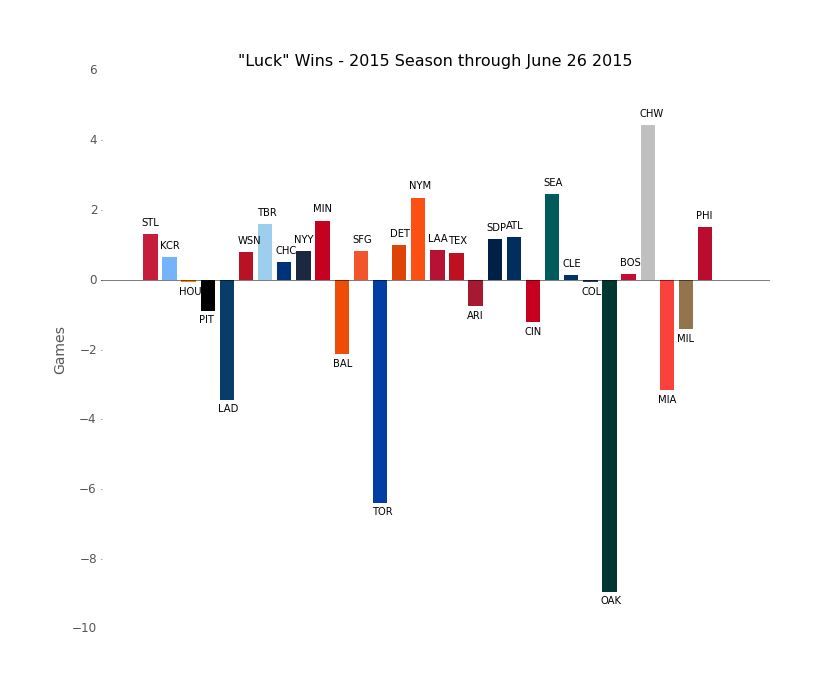

In [27]:
fig, ax = plt.subplots(figsize = (12, 10))

bar_width = 1.5
left_ = [2 * x + 1 + bar_width for x in df.WinRnk.tolist()]
ax.bar(left = left_, 
       height = df.LuckCalc, 
       width = bar_width,
       color = df.tmColor, 
       linewidth = 0
       );

for tm in df.Tm.tolist():
    row = df.loc[df.Tm == tm, :]
    if row.LuckCalc.values[0] < 0:
        plt.annotate(tm, xy = (row.WinRnk * 2 + .9 + bar_width, row.LuckCalc-.35))
    else:
        plt.annotate(tm, xy = (row.WinRnk * 2 + .9 + bar_width, row.LuckCalc+.25))

fig.frameon = False
ax.axhline(0, linewidth = 1, linestyle = '-', color = 'black', alpha = 0.5)
ax.set_xticklabels(());
ax.set_ylabel('Games')
plt.tick_params(bottom = False, top = False, right = False)

plt.title('"Luck" Wins - 2015 Season through June 26 2015')

plt.savefig('mlb_luck062715.png')

In [ ]:
def plot_team(r):
    xcoord = r.name*2 + 1.075
    if r.W < r.WinCalc: 
        win_marker = 's'
        calc_marker = 's'
    else:
        win_marker = 7
        calc_marker = 7
    
    ax.scatter(xcoord, r.W, marker = win_marker, linewidth = 1, color = 'r')
    ax.scatter(xcoord, r.WinCalc, marker = calc_marker, linewidth = 1, color = 'b')
    ax.axvline(x = xcoord, 
               ymin = min(r.W, r.WinCalc)/plt.ylim()[1], 
               ymax = max(r.W, r.WinCalc)/plt.ylim()[1],
               linewidth = 2,
               linestyle = '--'
               )
    pass


lim_min = min(0, df.WinCalc.min() - 1)
lim_max = max(df.L.max() + 1, df.WinCalc.max() + 1)

fig, ax = plt.subplots(figsize = (12,10))
plt.ylim((lim_min, lim_max));
df.apply(plot_team, axis = 1)
# df.apply(lambda r: ax.axvline(r.name+1, 28, 30, linewidth = 1), axis = 1)


plt.xlim((0, 61))
plt.ylim((lim_min, lim_max));

In [ ]:
def plot_team(r):
    xcoord = r.name*2 + 1.075
    # if r.W == r.WinCalc:
    #     win_marker == 'o'
    #     calc_marker == 'o'
    if r.W < r.WinCalc: 
        win_marker = 's'
        calc_marker = 's'
    else:
        win_marker = 7
        calc_marker = 7
    
    ax.scatter(xcoord, r.W, marker = win_marker, linewidth = 1, color = 'r')
    ax.scatter(xcoord, r.WinCalc, marker = calc_marker, linewidth = 1, color = 'b')
    ax.axvline(x = xcoord, 
               ymin = min(r.W, r.WinCalc)/plt.ylim()[1], 
               ymax = max(r.W, r.WinCalc)/plt.ylim()[1],
               linewidth = 2,
               linestyle = '--'
               )
    pass


lim_min = min(0, df.WinCalc.min() - 1)
lim_max = max(df.L.max() + 1, df.WinCalc.max() + 1)

fig, ax = plt.subplots(figsize = (12,10))
plt.ylim((lim_min, lim_max));
df.apply(plot_team, axis = 1)
# df.apply(lambda r: ax.axvline(r.name+1, 28, 30, linewidth = 1), axis = 1)


plt.xlim((0, 61))
plt.ylim((lim_min, lim_max));

0.28


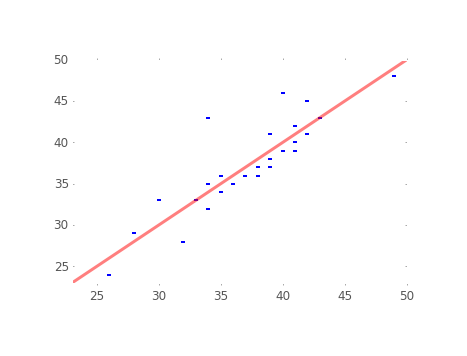

In [36]:
plt.scatter(df.W, df.WinCalc, marker = '_', linewidth = 2)

lim_min = min(df.W.min() - 1, df.WinCalc.min() - 1)
lim_max = max(df.L.max() + 1, df.WinCalc.max() + 1)
plt.xlim((lim_min, lim_max))
plt.ylim((lim_min, lim_max))
# plt.xlim((.3, .7))
# plt.ylim((.3, .7))

plt.plot(plt.xlim(), plt.ylim(), c = 'r', alpha = 0.5)
plt.axvline(21, ymin = 0, ymax = 14/plt.ylim()[1], linewidth = 1)
print 14/plt.ylim()[1]
# plt.xticks([x/float(10) for x in range(3, 8)], y = -.05)
 #plt.yticks([x/float(10) for x in range(3, 8)], x = -.05);